# Section 1 - The leaky-integrate and fire (LIF) model and python basics

## Section 1.1. 

In order to write programming scripts, we need a few basics: 

We will program our scripts in python, a very versatile and widely used programming language. 
To execute the written programs we need a <i>python interpreter</i>. Google colab allows us to run an instance in the browser, without the need to install anything locally on the computer. 




While learning the basics of python, we want to look at an example model taught in the lecture. The leaky integrate and fire (LIF) model. 
<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/neuron_to_circuit.png" width="750"/>
</div>

From the lecture we know that we can describe the change of the membrane potential with the following equation:

\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} + R_m\,I_e \qquad (1)
\end{equation}

We ignore the injected external current for now ($I_e = 0$) which means the equation simplifies to 
\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} \qquad (2)
\end{equation}

in this equation we have three parameters, let's define them. 

#### Task X - Execute the cell below
When executing a cell, the python interpreter will run the code we provide.

When you select the cell and either press 'Run' at the top of the page or press 'shift+Enter' on the keyboard. 

try it out:

In [69]:
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
print (tau_m, v, el)

20 -50 -60


#### Solution X -  What happend
1/2/3 We assigned values (on the right side of the equal sign) to three distinct variables (on the left of the equal sign).

In addition, we can comment the code by using the '#' symbol. Everything in the same line behind this symbol will be ignored when the code is executed.

4 At the end, we print the values that we just defined

Following equation (2), we can now calculate the change in the membrane voltage per time-step. 

In [70]:
dv_dt = (-v + el)/tau_m
print (dv_dt)

-0.5


This means the membrane potential changes by -0.5mV per ms if the membrane potential is at -50 mV. 

#### Task X - Calculate the voltage change for multiple time steps

After applying the change in voltage as we did above for one time step (adding -0.5mV/ms * 1ms to -50mV), we can ask again what the change is - given the new voltage value, then apply this again and so on

In [71]:
dt = 0.1 # in ms
v = -50 # in mV
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)

dv/dt -0.5
v -50.05
dv/dt -0.49750000000000016
v -50.09975


#### Solution X - What happend

1 We defined a new variable

2 We made sure that our variable defined above (v) is still at -50

3 calculating the instantaneous change in v

4 printing the calculated value, while also printing what the value is

5 setting v equal to its old value plus the change it experiences multiplied with our chosen timestep

6 printing v (and printing that we print v)

7 we repeat the steps 3) to 6)

Now thinking about even more repeats of these steps leads us to a very fundamental concept of programming: 

## Loops
More specifically, the for-loop.
Loops allow us to execute the same code multiple times, or even to let programs run indefinetly. We can re-write the above code with a for-loop.

#### Task X - Change the number of repetitions

Initially we execute the code block from above (2 times). You can change how often it will be repeated by changing the number in the 'range' function. Try it out.

In [21]:
dt = 0.1 # in ms
v = -50 # in mV

for ii in range(2):
    dv_dt = (-v + el)/tau_m
    print ('dv/dt', dv_dt)
    v = v + dv_dt * dt
    print ('v', v)

dv/dt -0.5
v -50.5
dv/dt -0.475
v -50.975


#### More information on the for-loop

You just executed a for-loop. The syntax of a for-loop is the following:
```python
    for iteration_variable in values_to_iterate_through:
        # do something
```

In our case the iteration variable is ii and the values_to_iterate_through are provided by the function range() where we can provide an input paramter.

It is important to note that we see an indentation after we defined our for-loop (and ended the line with a colon)

Everything that is indented will be executed within the loop. 
You can try it out with the example above by removing the indent for the last line. v will then be printed only when the loop is done.

Ususally, people use four or two spaces as the indentation level (or pressing TAB).

You can also access the iteration variable in the for-loop. you can try out the example below.   

#### Task X - Answer the following questions

0) execute the cell

1) what is the starting/ending value for the iteration variabel ii, does it make sense to you?

2) you will see that the iteration variable takes on integer values, how can you get floating point steps instead? - try it out

In [62]:
for ii in range(4):
    print (ii)

0
1
2
3


#### solution X

1) we start with the integer 0 and we always end one step before the value x (i.e. x-1) that we provide for the range function (so we always iterate for x steps)

2) to get floating point steps we can multiply our integer values with the floating point number we prefer (for example 0.1) 

We now use the for loop to run our code from above many times and look at the final value of v

#### Task  X - Change the starting value of v

When executing the cell below, you can now change the starting value of v. 

However, you should see that (given we have enough repetitions), your final v should always be very close to the same value. Can you explain why this is correct?

In [27]:
dt = 0.1 # in ms
v = -55 # in mV

for ii in range(1000):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt

print ('final v', v)

final v -59.99999999999993 -3.552713678800501e-15


#### Solution X 

we still simulate the time evolution of the membrane voltage v following equation (2). The equation describes how much the voltage changes, given it's current value and the fixed parameters we define at the beginning. We can see that the right side of the equation becomes 0, when v equals el. This means that there will be no change anymore - we reached a stable configuration, a fixed point. 

in a rather simple system like this, we can then realize that v will always evolve towards the value of 'el', independent of the starting value (the starting condition).

Bonus: you can actually calculate the integral of equation (2), what function do you get out? We will come back to this later ...

Until now we defined how v should evolve over time and we can see what the final value of v is, or print intermediate values of v. Ultimately, we want to save the values of v between the beginning and the end, in order to access them later on. This leads us to another variable type.

## Lists

Lists can store multiple varibales of the same, or even of different types. A list is defined like this
```python
    example_list = [1,2,3]
    empty_list = []
```
We can append elements to this list with 
```python
    empty_list.append(1)
```

#### Task x - save all intermediate values of v

can you re-write the code from above, so that we do not only print the final v but a list of all v's after the loop has finsihed?

In [66]:
dt = 0.1 # in ms
v = -55 # in mV
v_list = []

# continue here with your code

#### Solution X 

```python
dt = 0.1 # in ms
v = -55 # in mV
v_list = []
for ii in range(10):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt
    v_list.append(v) 

print (v_list)
```

Great! We now have run a simulation of the time evolution of the membrane voltage and saved the values of v. However, we would also like to have the corresponding values of the time that passed for every voltage value. 

#### Task X - save the time values as well

Can you re-write the code above, to not only save and print the voltage values, but also do the same for the time steps? 

#### Solution X 

```python
dt = 0.1 # in ms
v = -55 # in mV
v_list = []
t_list = []
for ii in range(10):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt
    v_list.append(v) 
    t_list.append(ii*dt)

print (v_list, t_list)
```

To get a better understanding of how the voltage evolves, we want to visualize the data.

## Plots

To visualize with python, we make use of a library. Libraries provide pre-written functions, so we don't have to write them from scratch. To import a library we have to add the following line (usually always at the beginning of the code)
```python
    import matplotlib.pyplot as plt
```
with this line we can import the library matplotlib.pyplot and we can call it from then on with the the name plt 

#### Task X - Play around

In the cell below you can play around with plotting. 
here is the original code of the cell in case you want to reset:
```python
import matplotlib.pyplot as plt

plt.figure()
plt.title('Example Plot')
x = [0,1]
y = [1,2]
plt.plot(x,y,color='red', linewidth=2.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
```
<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/simple_line_plot.png" width="350"/>
</div>


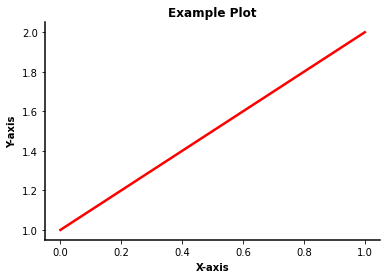

In [60]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Example Plot')
x = [0,1]
y = [1,2]
plt.plot(x,y,color='red', linewidth=2.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

#### Solution X - What happend

1) We import the library that we need for plotting. Once imported, we will be able to use it in every cell in this notebook. So for the next notebooks we will import it at the beginning.

3 We create a figure.

4 We add a title to the figure

5/6 we define our x- and y- values

7 we create a line-plot (plt.plot) the first argument of the function have to be the x-values, the second the y-values. then we have some specified parameters, like the color or the linewidth. If you are interested - there are many paramters more we can modify - we'll learn about them later on

8/9 we label the x- and y-axis

10 we show the plot - this line is not necessary in notebooks like this one, but you need it for python scripts for example. 


#### Task X - Plot the time evolution of the membrane voltage

Try to combine the code where we calculate and save the v and t values and the plotting code to create a figure that should look roughly like this:

(with a starting value of v = -55, a timestep dt=0,1 and iterating over range(1000) )

<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/membrane_voltage_decay.png" width="350"/>
</div>


In [ ]:
### Add your code here

#### Solution X

```python
dt = 0.1 # in ms
v = -55 # in mV
v_list = []
t_list = []

for ii in range(1000):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt
    v_list.append(v) 
    t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time

plt.figure()
plt.title('Time evolution of membrane voltage')
plt.plot(t_list,v_list,linewidth=2.5)
plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.show()
```

In [89]:
def test_function(v_start):
    v_list = []
    t_list = []
    
    dt = 0.1
    v = v_start
    for ii in range(1000):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list

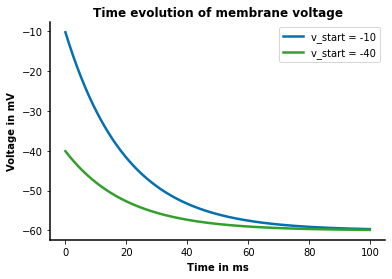

In [90]:
v_list_1, t_list_1 = test_function(v_start=-10)
v_list_2, t_list_2 = test_function(v_start=-40)
plt.figure()
plt.title('Time evolution of membrane voltage')
plt.plot(t_list_1,v_list_1,linewidth=2.5, label='v_start = -10')
plt.plot(t_list_2,v_list_2,linewidth=2.5, label='v_start = -40')
plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.legend()
plt.show()